Files already downloaded and verified
Files already downloaded and verified
Starting epoch 1
Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10


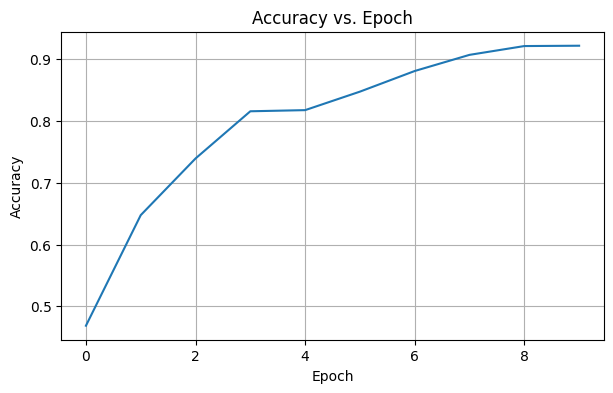

In [1]:
import os

import matplotlib.pyplot as plt
import torch
import torch.nn as nn

from utils.data import get_train_dataloader, get_test_dataloader
from utils.model import VGG
from utils.optim import GD
from utils.accuracy import compute_accuracy

# Папка для сохранения графиков
graphs_dir = "./graphs"
os.makedirs(graphs_dir, exist_ok=True)
device = 'mps'

model = VGG().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = GD(model.parameters(), lr=0.1)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1,
#                     momentum=0.9, weight_decay=5e-4)

testloader = get_test_dataloader()
trainloader = get_train_dataloader()

num_epochs = 10
accuracies = []
max_idx = 0

saved_grads = {}
for epoch in range(num_epochs):
    print(f"Starting epoch {epoch+1}") 
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()

        output = model(inputs)
        loss = criterion(output, targets)
        loss.backward()

        for name, param in model.named_parameters():
            saved_grads[name] += param.grad.detach()

        optimizer.zero_grad()
        for name, param in model.named_parameters():
            param.grad = saved_grads[name]

        optimizer.step()


    accuracies.append( compute_accuracy(model, trainloader))
        
plt.figure(figsize=(7, 4))
plt.plot(accuracies)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Epoch")
plt.grid(True)
plt.show()



In [2]:
accuracies[-1]

0.9218